<a href="https://colab.research.google.com/github/zzvcgmv/FHS/blob/main/FHS_EDA%2BLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#FHS_link = 'https://drive.google.com/file/d/1LTC4DR34YKCTMeW0H72hd8qo-dubcO6C/view?usp=sharing'
idFHS = "1LTC4DR34YKCTMeW0H72hd8qo-dubcO6C"
file = drive.CreateFile({'id':idFHS})
file.GetContentFile('framingham.csv')

**1. Load the Dataset and Import Packages**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
sns.set()
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv('framingham.csv')
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

In [ ]:
df.size

67840

In [ ]:
# Convert columns to the correct data type
df['gender'] = df['gender'].astype('category')
df['education'] = df['education'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['BPMeds'] = df['BPMeds'].astype('category')
df['prevalentStroke'] = df['prevalentStroke'].astype('category')
df['prevalentHyp'] = df['prevalentHyp'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['TenYearCHD'] = df['TenYearCHD'].astype('category')

In [ ]:
# Summary Statistics
## Continuous Variables
df.describe()
## Categorical Variable Distribution
categorical_columns = ["gender", "education", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
categorical_summary = []
for col in categorical_columns:
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100

    summary_df = pd.DataFrame({
        "Category": counts.index.fillna("Missing"),
        "Count": counts.values,
        "Percentage": percentages.values
    })

    summary_df["Cumulative Percentage"] = summary_df["Percentage"].cumsum()

    summary_df["Variable"] = col
    categorical_summary.append(summary_df)

categorical_summary_df = pd.concat(categorical_summary)
print(categorical_summary_df)

  Category  Count  Percentage  Cumulative Percentage         Variable
0        0   2420   57.075472              57.075472           gender
1        1   1820   42.924528             100.000000           gender
0      1.0   1720   40.566038              40.566038        education
1      2.0   1253   29.551887              70.117925        education
2      3.0    689   16.250000              86.367925        education
3      4.0    473   11.155660              97.523585        education
4  Missing    105    2.476415             100.000000        education
0        0   2145   50.589623              50.589623    currentSmoker
1        1   2095   49.410377             100.000000    currentSmoker
0      0.0   4063   95.825472              95.825472           BPMeds
1      1.0    124    2.924528              98.750000           BPMeds
2  Missing     53    1.250000             100.000000           BPMeds
0        0   4215   99.410377              99.410377  prevalentStroke
1        1     25   

<Figure size 300x200 with 0 Axes>

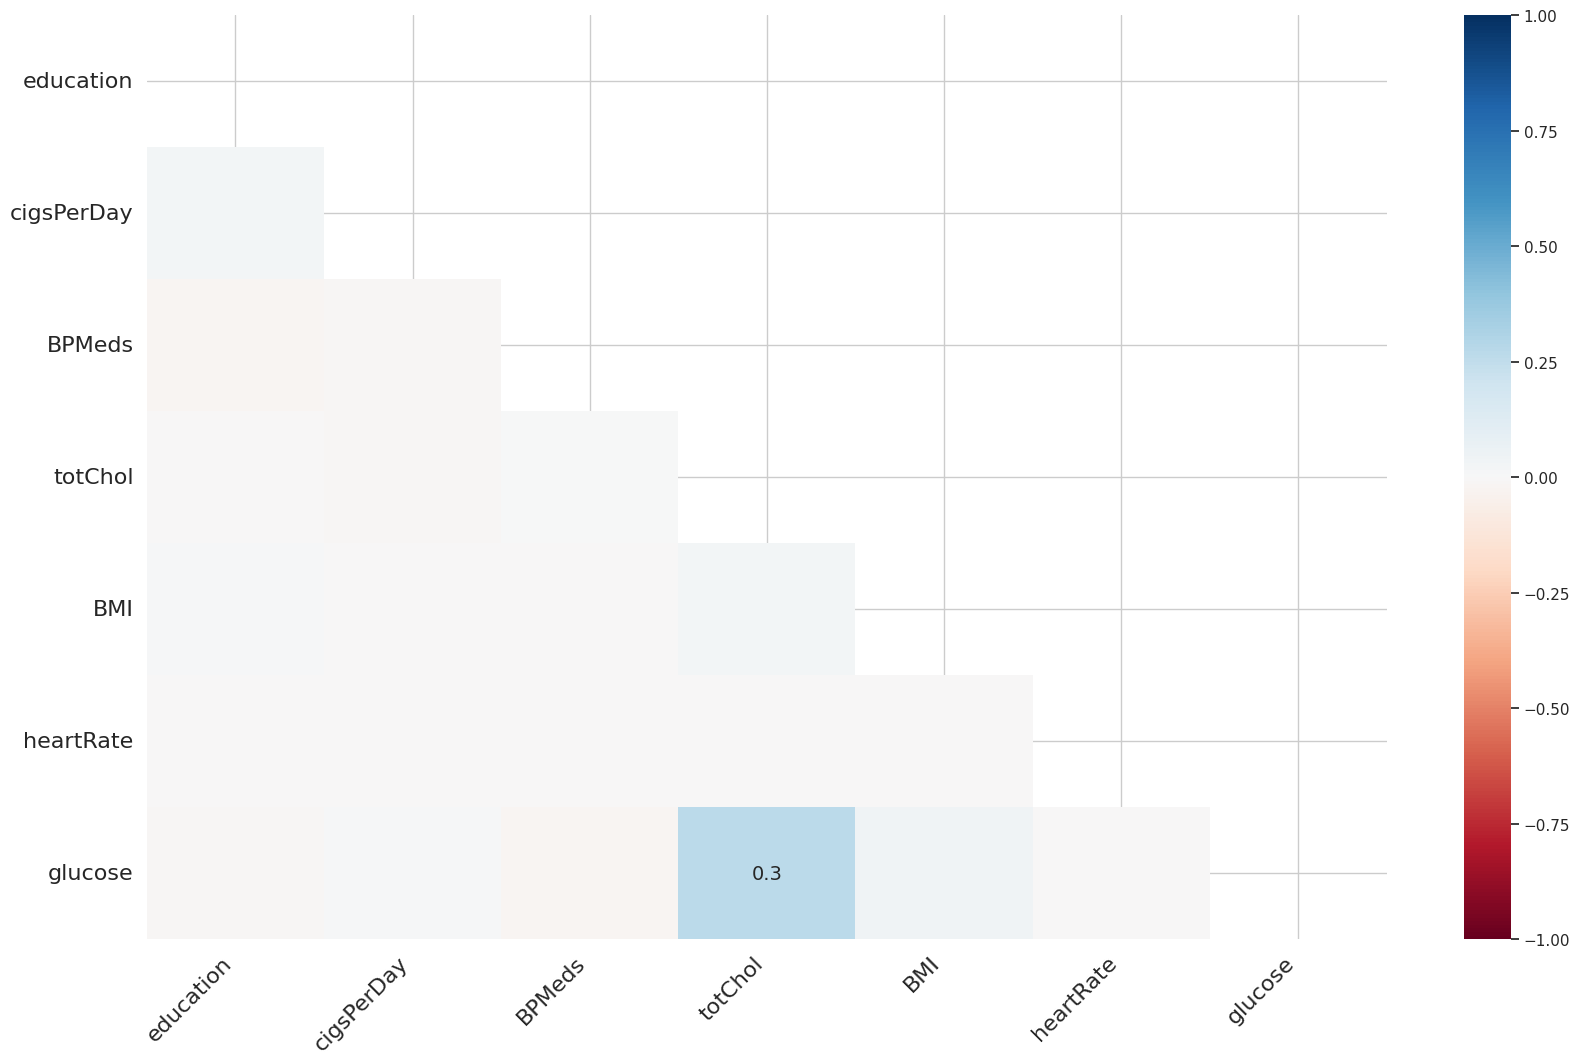

In [ ]:
# Heatmap of missing values correlation
plt.figure(figsize=(3,2))
msno.heatmap(df)
plt.show()

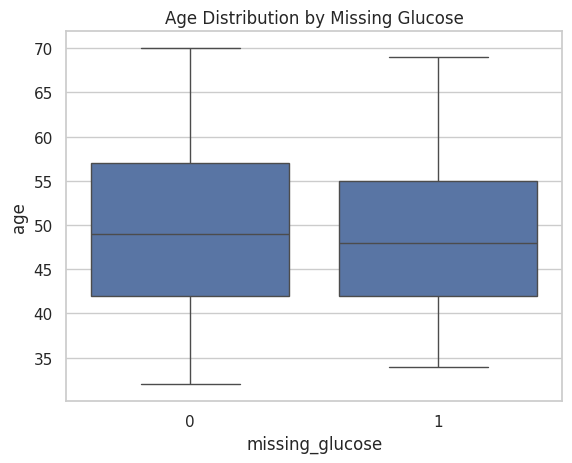

T-test Statistic: -1.4369968077703745
T-test p-value: 0.15137834680089088
Mann-Whitney U Statistic: 717110.0
Mann-Whitney U p-value: 0.18891397734928295


In [ ]:
# Compare Distributions of Observed vs. Missing Groups
df["missing_glucose"] = df["glucose"].isna().astype(int)
sns.boxplot(x="missing_glucose", y="age", data=df)
plt.title("Age Distribution by Missing Glucose")
plt.show()

age_missing = df[df["glucose"].isna()]["age"]
age_non_missing = df[df["glucose"].notna()]["age"]

# Conducting an independent t-test (assumes normality)
t_stat, t_pvalue = ttest_ind(age_missing, age_non_missing, equal_var=False, nan_policy='omit')
# Conducting Mann-Whitney U test (non-parametric alternative)
u_stat, u_pvalue = mannwhitneyu(age_missing, age_non_missing, alternative='two-sided')

print("T-test Statistic:", t_stat)
print("T-test p-value:", t_pvalue)
print("Mann-Whitney U Statistic:", u_stat)
print("Mann-Whitney U p-value:", u_pvalue)
### P-value > 0.05, meaning there is no statistically significant difference in age distribution between those with and without missing glucose values.
### Satisified, don't need to use Mann-Whitney U test

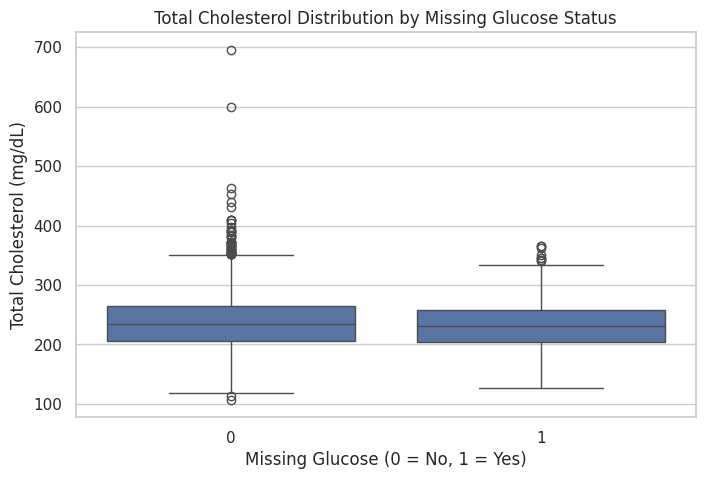

T-test Statistic: -1.3987722241725458
T-test p-value: 0.16261940396447605
Mann-Whitney U Statistic: 641104.0
Mann-Whitney U p-value: 0.20472850722985647


In [ ]:
df["missing_glucose"] = df["glucose"].isna().astype(int)

plt.figure(figsize=(8, 5))
sns.boxplot(x="missing_glucose", y="totChol", data=df)
plt.title("Total Cholesterol Distribution by Missing Glucose Status")
plt.xlabel("Missing Glucose (0 = No, 1 = Yes)")
plt.ylabel("Total Cholesterol (mg/dL)")
plt.show()

chol_missing = df[df["glucose"].isna()]["totChol"].dropna()
chol_non_missing = df[df["glucose"].notna()]["totChol"].dropna()
t_stat, t_pvalue = ttest_ind(chol_missing, chol_non_missing, equal_var=False, nan_policy='omit')
u_stat, u_pvalue = mannwhitneyu(chol_missing, chol_non_missing, alternative='two-sided')
print("T-test Statistic:", t_stat)
print("T-test p-value:", t_pvalue)
print("Mann-Whitney U Statistic:", u_stat)
print("Mann-Whitney U p-value:", u_pvalue)

**2. Data Clean**

1.   Missing Values Check and Imputation
2.   Data Preprocessing



In [ ]:
# Remove missing glucose column first
df.drop(columns=['missing_glucose'], inplace=True)
df.isnull()
missingValues = df.isnull().sum()
missingValues

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
# Impute missing values in 'education' with the mode (most frequent value)
impute_mode = ['education', 'BPMeds']
impute_median = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

for col in impute_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in impute_median:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
# Preprocessing
df.duplicated().sum()
framingham = df.drop_duplicates()
framingham.shape

(4240, 16)

In [ ]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**3. EDA**

<Axes: >

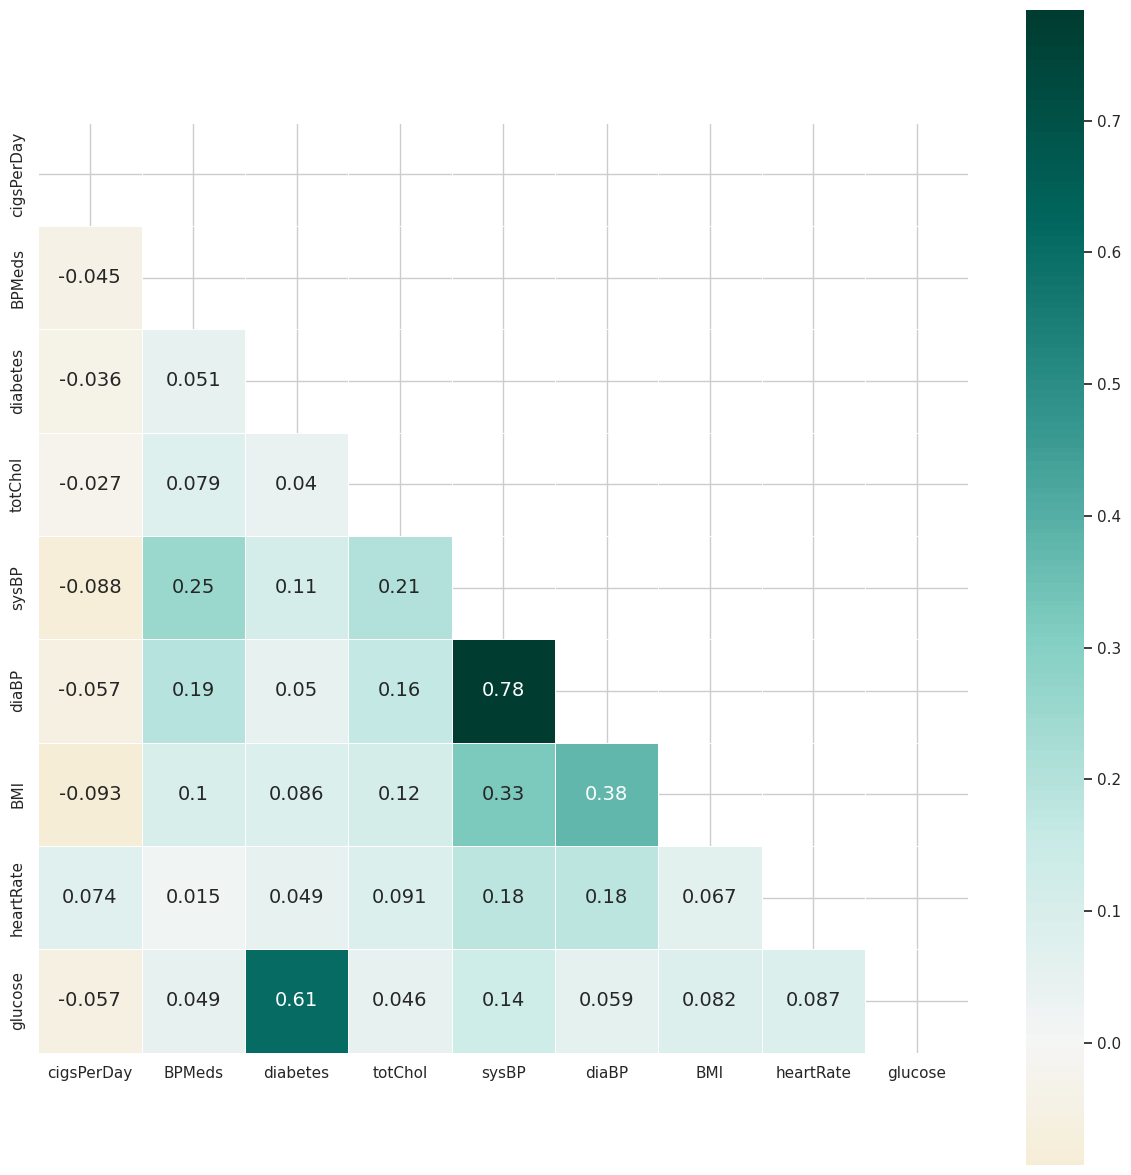

In [ ]:
corr_matrix = df.drop(columns=["age", "gender", "education", "currentSmoker", "prevalentStroke", "prevalentHyp", "TenYearCHD"]).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(1, figsize=(15, 15))
sns.heatmap(corr_matrix, mask=mask, cmap='BrBG', center=0, annot=True, square=True, annot_kws={"fontsize": 14}, linewidths=0.5)

**Demogrphics and Health Characteristics of the surveyed population**



1.   Categorical variables

  *   Distribution (with the Most Frequent) of Age
  *   Distribution (with proportion) of Gender/Education in FHS

2.   Continuous variabless
  *   Density plots (with skewness) of key cardiovascular risk factors

*   Distribution of heart rate and age groups
*   Systolic blood pressure, Diastolic blood pressures, Glucose and Total Cholesterol vary across different age groups and genders
*   Systolic blood pressure, Diastolic blood pressure, Total Cholesterol, and Ten-Year CHD risk related to each other

Text(40, 50, 'Most Frequent Age: 40')

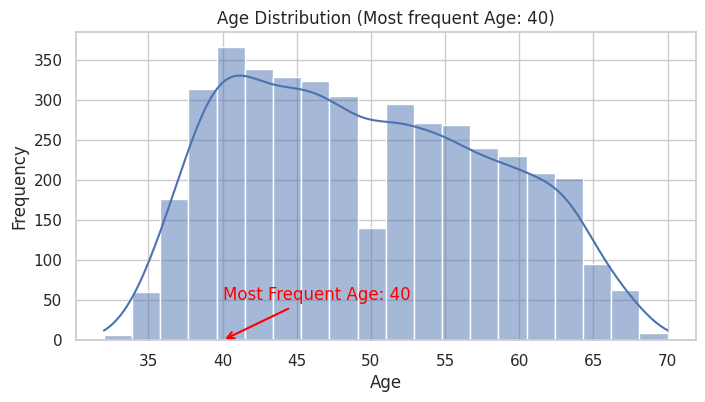

In [ ]:
mostFrequentAge = df['age'].mode().values[0]
plt.figure(figsize=(8, 4))
ax = sns.histplot(df['age'], bins=20, kde=True)
ax.set_title(f'Age Distribution (Most frequent Age: {mostFrequentAge})')
ax.set(xlabel='Age', ylabel='Frequency')

plt.annotate(f'Most Frequent Age: {mostFrequentAge}', xy=(mostFrequentAge, 0), xytext=(mostFrequentAge, 50),
             arrowprops=dict(arrowstyle='->', lw=1.5, color='red'), color='red')
# The majority of subjects fall within the age range of 40 to 50, followed by those in the 50 to 70 age range.

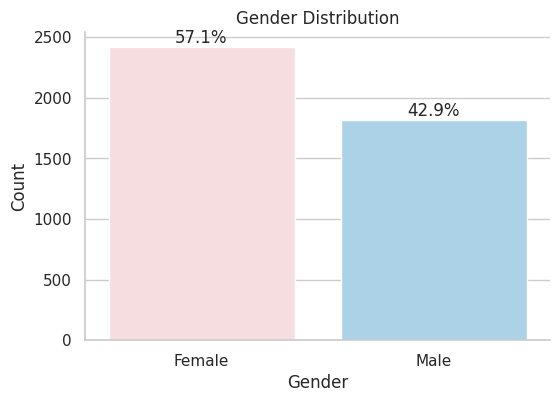

In [ ]:
## Plot gender distribution
colors1 = ["#FADADD", "#A2D5F2"]
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='gender', palette=colors1)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

total_count = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
ax.set_xticklabels(['Female', 'Male'])
sns.despine()
### slightly majority female, with 57.1% of the population being female and 42.9% of the population being male.

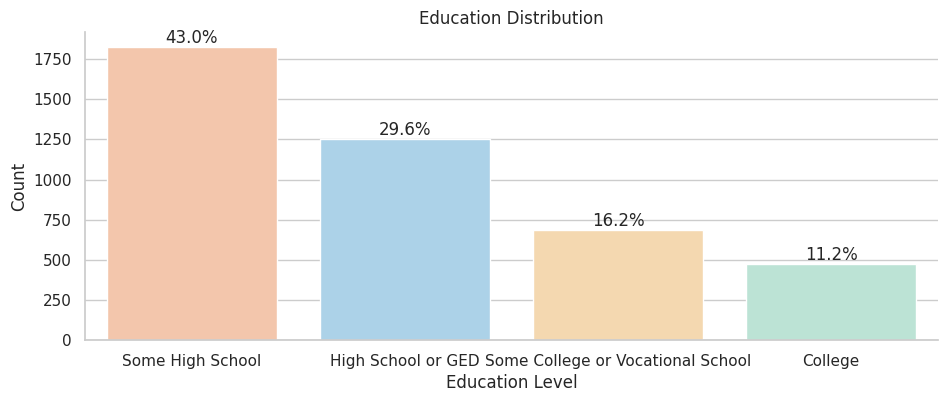

In [ ]:
# Plot the disribution of Education
colors2 = ["#FFC3A0", "#A2D5F2", "#FFDAA5", "#B5EAD7", "#C7CEEA", "#FFB7B2"]
plt.figure(figsize=(11,4))
ax = sns.countplot(data=df, x='education', palette=colors2)
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

total_count = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_count:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
ax.set_xticklabels(['Some High School', 'High School or GED', 'Some College or Vocational School', 'College'])
sns.despine()

In [ ]:
# Define age and heart rate grouping functions using lambda functions and apply groups to create new columns
ageGroups = lambda x: 0 if x <= 40 else (1 if x <= 55 else 2)
heartRateGroups = lambda x: 0 if x <= 60 else (1 if x <= 100 else 2)
df['age_groups'] = df['age'].apply(ageGroups)
df['heart_rate_groups'] = df['heartRate'].apply(heartRateGroups)

plotly_df = df.copy()
plotly_df['heart_rate_groups'] = plotly_df['heart_rate_groups'].map({0: 'Low', 1: 'Normal', 2: 'High'})
plotly_df['age_groups'] = plotly_df['age_groups'].map({0: 'Adults', 1: 'Middle-Aged', 2: 'Senior'})
# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('HeartRate (Grouped)', 'Count by Age Group'))
# Create the first plot (HeartRate Grouped)
fig.add_trace(go.Bar(x=plotly_df['heart_rate_groups'].value_counts().index, y=plotly_df['heart_rate_groups'].value_counts(), marker_color='#FADADD'), row=1, col=1)
fig.update_xaxes(title_text='Heart Rate Group', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)
# Create the second plot (Count by Age Group)
fig.add_trace(go.Bar(x=plotly_df['age_groups'].value_counts().index, y=plotly_df['age_groups'].value_counts(), marker_color='#A2D5F2'), row=1, col=2)
fig.update_xaxes(title_text='Age Group', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

fig.update_layout(height=400, width=1000, showlegend=False)
fig.update_layout(title_text="Heart Rate and Age Group Analysis")
fig.show()
### majority of subjects exhibit a normal heart rate, followed by those with resting or low heart rates,
### and a smaller number with high heart rates.

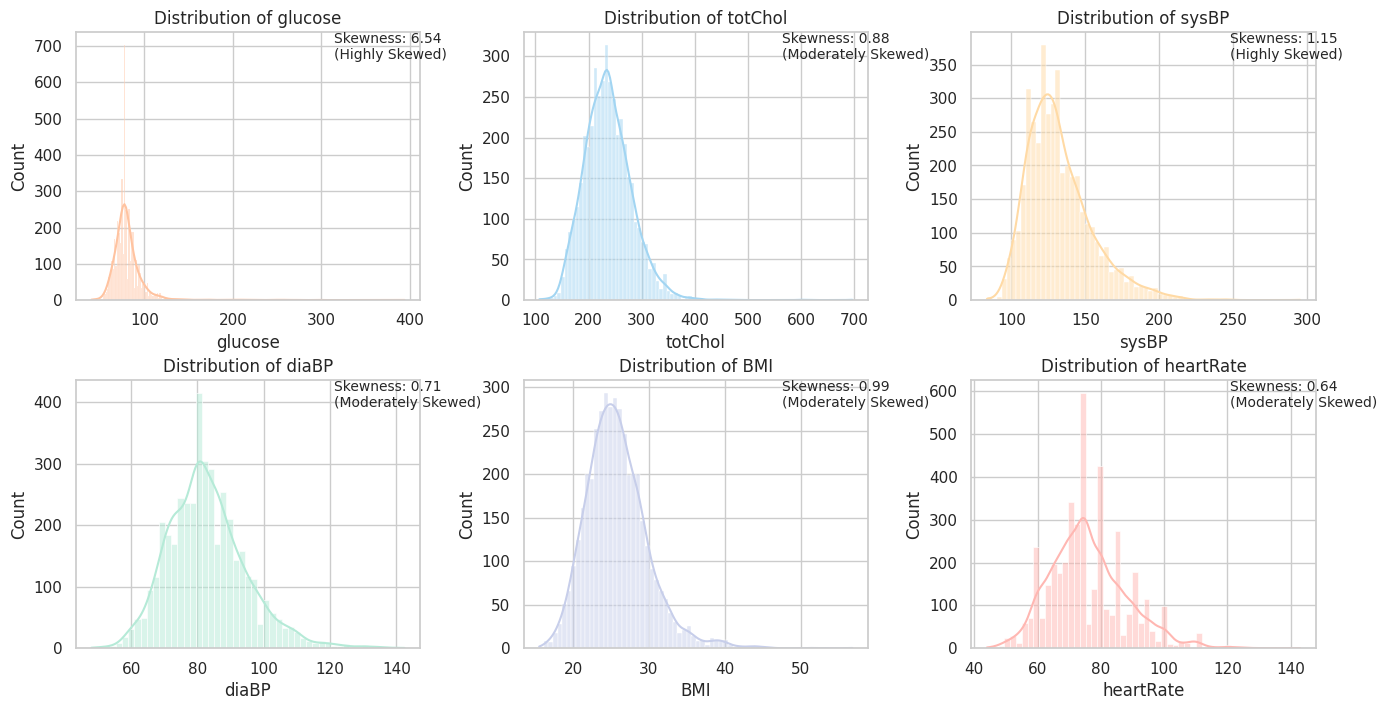

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
variables = ['glucose', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']

# Skewness labels based on criteria
def get_skew_label(skewness):
    if skewness < -1 or skewness > 1:
        return 'Highly Skewed'
    elif (-1 <= skewness <= -0.5) or (0.5 <= skewness <= 1):
        return 'Moderately Skewed'
    else:
        return 'Approximately Symmetric'

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], color=colors2[i - 1], kde=True)  # Plot histogram and KDE
    plt.title(f'Distribution of {var}')

    skewness = df[var].skew()
    skew_label = get_skew_label(skewness)

    plt.text(0.75, 0.9, f'Skewness: {skewness:.2f}\n({skew_label})', transform=plt.gca().transAxes, fontsize=10)

### All Right-skewed

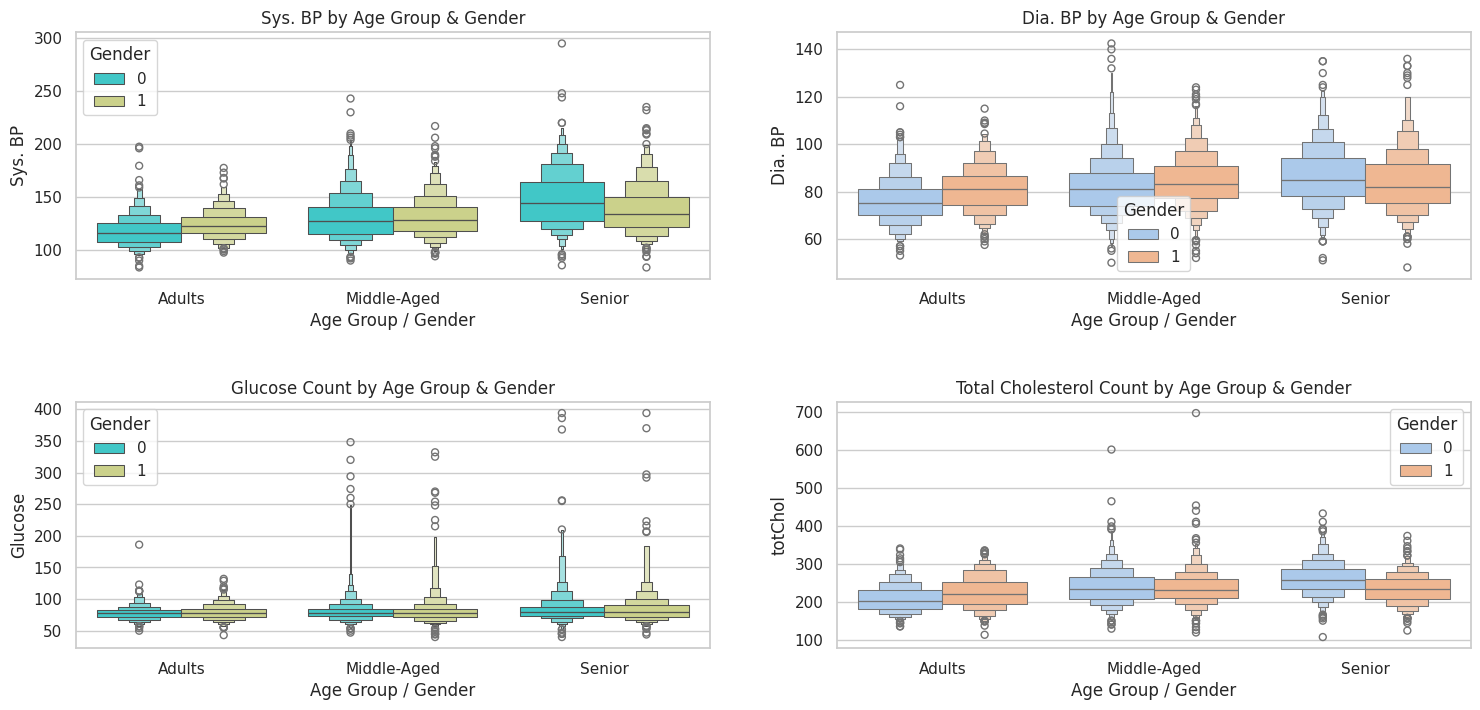

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
ageGroupLabels = ['Adults', 'Middle-Aged', 'Senior']
# Create the boxenplots for Sys. BP
plt.subplot(2, 2, 1)
sns.boxenplot(x='age_groups', y='sysBP', hue='gender', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')
# Create the boxenplot for Dia. BP
plt.subplot(2, 2, 2)
sns.boxenplot(x='age_groups', y='diaBP', hue='gender', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Dia. BP by Age Group & Gender')
plt.legend(title='Gender')
# Create the boxenplot for glucose
plt.subplot(2, 2, 3)
sns.boxenplot(x='age_groups', y='glucose', hue='gender', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')
# Create the boxenplot for totChol
plt.subplot(2, 2, 4)
sns.boxenplot(x='age_groups', y='totChol', hue='gender', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('totChol')
plt.xticks(ticks=[0, 1, 2], labels=ageGroupLabels)
plt.title('Total Cholesterol Count by Age Group & Gender')
plt.legend(title='Gender')
### both SBP and DBP tend to increase with age.
### the rate of increase is different for SBP and DBP. SBP tends to increase more rapidly than DBP, especially after the age of 50.
### glucose also increase with age. Gender wise Glucose Count has almost similiar Median with Few outliers in each.
### by excluding outliers there is a general trend of increasing total cholesterol levels with age for females, for Males the Cholesterol level Quantile is Approx. e group.

Text(0.5, 1.0, 'Pairplot of sysBP, diaBP, totChol vs. TenYearCHD')

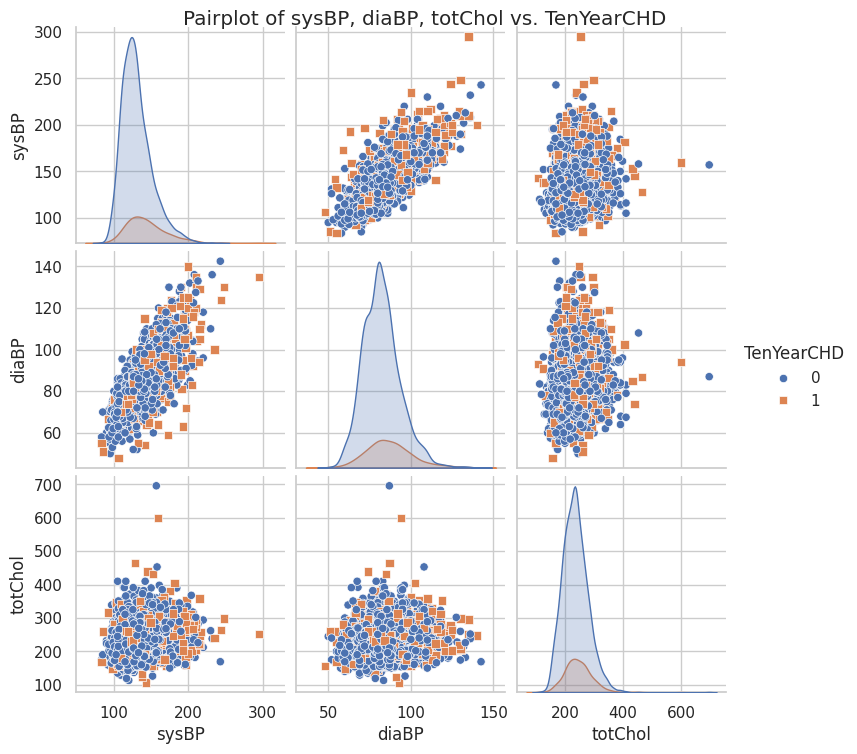

In [ ]:
### sysBP, diaBP, totChol, and TenYearCHD are all risk factors for coronary heart disease.
sns.pairplot(data=df, vars=['sysBP', 'diaBP', 'totChol'], hue='TenYearCHD', markers=["o", "s"])
plt.suptitle('Pairplot of sysBP, diaBP, totChol vs. TenYearCHD', y=1.00)



*   There is a positive correlation between sysBP and TenYearCHD, meaning that people with higher systolic blood pressure have a higher risk of developing coronary heart disease within 10 years.
*   There is a positive correlation between diaBP and TenYearCHD, meaning that people with higher diastolic blood pressure also have a higher risk of developing coronary heart disease within 10 years.
*   There is a positive correlation between totChol and TenYearCHD, meaning that people with higher total cholesterol levels also have a higher risk of developing coronary heart disease within 10 years.
*   There is a positive correlation between sysBP and diaBP, meaning that people with higher systolic blood pressure tend to also have higher diastolic blood pressure.
*   There is a positive correlation between sysBP and totChol, meaning that people with higher systolic blood pressure tend to also have higher total cholesterol levels.
*   There is a positive correlation between diaBP and totChol, meaning that people with higher diastolic blood pressure tend to also have higher total cholesterol levels.



In [ ]:
df.drop(columns=['age_groups', 'heart_rate_groups'], inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dtypes
df["TenYearCHD"] = df["TenYearCHD"].astype(int)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from collections import Counter
import statsmodels.api as sm

**4. Logistic Regression Feature Estimation**

In [ ]:
# Modeling Target Variable: TenYearCHD
# Convert categorical columns to object dtype before get_dummies
df[categorical_columns] = df[categorical_columns].astype('object')
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Fill any potential NaNs introduced by get_dummies before converting to int
df_encoded = df_encoded.fillna(0).astype(int)
df_encoded.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,39,0,195,106,70,26,80,77,0,1,0,0,1,0,0,0,0,0
1,46,0,250,121,81,28,95,76,0,0,1,0,0,0,0,0,0,0
2,48,20,245,127,80,25,75,70,0,1,0,0,0,1,0,0,0,0
3,61,30,225,150,95,28,65,103,1,0,0,1,0,1,0,0,1,0
4,46,23,285,130,84,23,85,85,0,0,0,1,0,1,0,0,0,0


In [ ]:
x = df_encoded.drop(columns=['TenYearCHD'])
y = df_encoded['TenYearCHD']
X = sm.add_constant(x)

## Multicollinearity Assessment
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,const,193.469478
1,age,1.410420
2,cigsPerDay,2.574145
3,totChol,1.107649
4,sysBP,3.737634
5,diaBP,2.964473
6,BMI,1.240432
7,heartRate,1.097358
8,glucose,1.612033
9,gender_1,1.212388


In [ ]:
# Conduct Logistic Regression Model
X['sysBP_diaBP_interaction'] = X['sysBP']*X['diaBP']
X['sysBP_totChol_interaction'] = X['sysBP']*X['totChol']
X['diaBP_totChol_interaction'] = X['diaBP']*X['totChol']
X['sysBP_diaBP_totChol_interaction'] = X['sysBP']*X['diaBP']*X['totChol']
X['glucose_diabetes_interaction'] = X['glucose']*X['diabetes_1']

logModel = sm.Logit(y,X,).fit()
logModel.summary()

Optimization terminated successfully.
         Current function value: 0.377303
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4217
Method:                           MLE   Df Model:                           22
Date:                Wed, 04 Jun 2025   Pseudo R-squ.:                  0.1142
Time:                        23:21:43   Log-Likelihood:                -1599.8
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 9.902e-74
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -18.5365      8.205     -2.259      0.024     -34.618      -2.455
age                                 0.0605      0.006      9.563      0.000       0.048       0.073
cigsPerDay                          0.0210      0.006      3.713      0.000       0.010       0.032
totChol                             0.0544      0.034      1.618      0.106      -0.011       0.120
sysBP                               0.1007      0.057      1.755      0.079      -0.012       0.213
diaBP                               0.0957      0.098      0.974      0.330      -0.097       0.288
BMI                                 0.0033      0.012      0.280      0.780      -0.020       0.027
heartRate                          -0.0006      0.004     -0.164      0.870      -0.008       0.007
glucose                             0.0033      0.004      0.928      0.353      -0.004       0.010
gender_1                            0.4852      0.102      4.779      0.000       0.286       0.684
education_2.0                      -0.1931      0.116     -1.670      0.095      -0.420       0.034
education_3.0                      -0.0983      0.139     -0.706      0.480      -0.371       0.175
education_4.0                       0.0328      0.152      0.215      0.830      -0.266       0.332
currentSmoker_1                     0.0203      0.143      0.142      0.887      -0.260       0.301
BPMeds_1.0                          0.2130      0.224      0.952      0.341      -0.225       0.651
prevalentStroke_1                   1.0018      0.446      2.246      0.025       0.127       1.876
prevalentHyp_1                      0.2834      0.133      2.123      0.034       0.022       0.545
diabetes_1                         -0.3884      0.612     -0.635      0.526      -1.588       0.811
sysBP_diaBP_interaction            -0.0008      0.001     -1.290      0.197      -0.002       0.000
sysBP_totChol_interaction          -0.0004      0.000     -1.757      0.079      -0.001    4.74e-05
diaBP_totChol_interaction          -0.0005      0.000     -1.250      0.211      -0.001       0.000
sysBP_diaBP_totChol_interaction  3.929e-06   2.56e-06      1.536      0.124   -1.08e-06    8.94e-06
glucose_diabetes_interaction        0.0051      0.005      1.106      0.269      -0.004       0.014
===================================================================================================
"""

In [ ]:
coefficients = logModel.params
conf_int = logModel.conf_int()
p_values = logModel.pvalues
odds_ratios = np.exp(coefficients)
conf_int_exp = np.exp(conf_int)
results_df = pd.DataFrame({
    "Coefficient": coefficients,
    "P-value": p_values,
    "Odds Ratio": odds_ratios,
    "Lower 95% CI (Exp)": conf_int_exp.iloc[:, 0],
    "Upper 95% CI (Exp)": conf_int_exp.iloc[:, 1]
})
results_df

,Coefficient,P-value,Odds Ratio,Lower 95% CI (Exp),Upper 95% CI (Exp)
const,-18.536547,2.387531e-02,8.905946e-09,9.234762e-16,0.085888
age,0.060519,1.139234e-21,1.062387e+00,1.049292e+00,1.075646
cigsPerDay,0.020967,2.049343e-04,1.021189e+00,1.009948e+00,1.032554
totChol,0.054440,1.055714e-01,1.055949e+00,9.885771e-01,1.127912
sysBP,0.100666,7.922627e-02,1.105907e+00,9.883245e-01,1.237478
diaBP,0.095713,3.298147e-01,1.100443e+00,9.077443e-01,1.334049
BMI,0.003322,7.797325e-01,1.003328e+00,9.802359e-01,1.026964
heartRate,-0.000640,8.698830e-01,9.993602e-01,9.917364e-01,1.007043
glucose,0.003332,3.533635e-01,1.003338e+00,9.963019e-01,1.010424
gender_1,0.485244,1.762692e-06,1.624572e+00,1.331400e+00,1.982299
